## Imports + Setup

In [5]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

import sys

sys.path.append("../")

import torch
import matplotlib.pyplot as plt
import numpy as np

%pip install git+https://github.com/ahwillia/netrep.git -q

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
Note: you may need to restart the kernel to use updated packages.


Set random seed:

In [2]:
seed = 0

## Inspect NSD fMRI data

Load dataset

In [7]:
sys.path.append("../neurometry/rep_metrics/")

from benchmarks import NSDBenchmark

benchmark = NSDBenchmark()

Now loading the NSD_shared1000 image set and the EVC-OTC voxel set...


### Stimulus image information

There are 1000 stimulus images
Image description: f['Two giraffes walk along a rocky path, near a tree.', 'Two giraffes walking down a path near some dead trees.', 'The giraffes are walking over the fallen down branches.', ' couple of giraffe walking along a rock covered dirt road.', 'two giraffes some rocks grass dirt and trees']


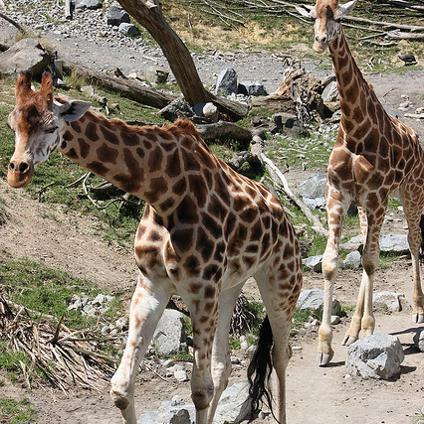

In [8]:
print(f"There are {benchmark.stimulus_data.shape[0]} stimulus images")
benchmark.stimulus_data.head()

stimulus_id = 59

print(
    f"Image description: f{benchmark.stimulus_data.loc[stimulus_id]['coco_captions']}"
)
benchmark.get_stimulus(stimulus_id)

### fMRI voxel metadata

In [9]:
anatomical_rois = ["early", "ventral", "lateral", "EVC", "OTC"]
functional_rois = [
    "V1v",
    "V1d",
    "V2v",
    "V2d",
    "V3v",
    "V3d",
    "hV4",
    "FFA-1",
    "FFA-2",
    "OFA",
    "EBA",
    "FBA-1",
    "FBA-2",
    "OPA",
    "PPA",
    "VWFA-1",
    "VWFA-2",
    "OWFA",
]

In [10]:
benchmark.roi_voxel_counts

{'OTC': 8088,
 'EVC': 4657,
 'early': 3726,
 'ventral': 3268,
 'lateral': 2572,
 'EBA': 2525,
 'OPA': 1173,
 'V2v': 834,
 'V1d': 756,
 'PPA': 734,
 'hV4': 687,
 'VWFA-1': 662,
 'V3v': 646,
 'V2d': 599,
 'V1v': 594,
 'V3d': 541,
 'FFA-1': 418,
 'OWFA': 359,
 'VWFA-2': 355,
 'FBA-1': 333,
 'FBA-2': 313,
 'OFA': 269,
 'FFA-2': 211}

In [11]:
benchmark.metadata.head()

,subj_id,ncsnr,EVC,early,ventral,midventral,lateral,midlateral,parietal,midparietal,...,FFA-2,OFA,EBA,FBA-1,FBA-2,OPA,PPA,VWFA-1,VWFA-2,OWFA
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-22-11-34,1,0.248737,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-22-11-35,1,0.159338,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-22-12-33,1,0.145336,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-23-10-33,1,0.054892,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-23-10-34,1,0.172727,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Example of voxel that is both in EVC and OTC:

In [12]:
benchmark.metadata.loc["S1-22-11-34"]

,subj_id,ncsnr,EVC,early,ventral,midventral,lateral,midlateral,parietal,midparietal,...,FFA-2,OFA,EBA,FBA-1,FBA-2,OPA,PPA,VWFA-1,VWFA-2,OWFA
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-22-11-34,1,0.248737,1.0,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S1-22-11-34,1,0.248737,NaN,0,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### fMRI response data

In [13]:
print(
    f"There are {benchmark.response_data.shape[0]} voxels recorded on {benchmark.response_data.shape[1]} stimulus images"
)
benchmark.response_data.head()

There are 12745 voxels recorded on 1000 stimulus images


,584,605,625,650,1308,1625,1877,2270,2349,2372,...,575701,575971,576011,576749,576789,577817,577964,578169,579906,580813
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-22-11-34,0.752486,-0.297966,-0.108485,0.027122,0.574349,-0.922022,0.244273,-0.129998,-0.156549,-0.097647,...,0.811811,0.334647,0.576700,-0.051925,0.960291,1.350665,0.745355,-0.587113,-1.248250,-0.684790
S1-22-11-35,-0.103754,0.244961,0.504785,-0.929686,-1.126533,-0.101796,-0.451838,-1.169137,-0.005067,0.310044,...,1.485696,0.213420,1.042587,-0.898903,-0.055290,0.927589,0.634646,0.320112,0.194043,-1.279413
S1-22-12-33,-0.569562,0.082608,0.327680,0.350439,-0.775774,-0.040204,-0.336788,-0.033517,0.059881,0.033386,...,-0.042141,0.052800,0.480060,0.420772,0.358667,0.415686,0.425214,0.281323,-0.422511,-0.626106
S1-23-10-33,0.802062,0.366396,-0.060212,0.717037,-0.578445,0.318957,0.177282,-0.390726,0.566761,0.003886,...,-0.649402,-0.205219,-0.324081,0.658013,0.643523,0.038668,0.335630,-0.877173,-1.218459,-0.321058
S1-23-10-34,0.267148,-0.457386,1.764591,-0.621412,0.296390,-0.758162,-0.369534,-0.403290,-0.816647,-0.263991,...,1.237165,0.443143,1.142742,-0.467000,0.029254,0.263533,0.857254,0.607774,-0.189726,-1.609570


### Organize fMRI voxel responses according to functional region in dict 'neural_data':

In [14]:
neural_data = {}
for region in functional_rois:
    region_voxel_idxs = benchmark.metadata[benchmark.metadata[region] == True].index
    neural_data[region] = benchmark.response_data.loc[region_voxel_idxs]
    neural_data[region] = neural_data[region].drop_duplicates()
    print(f"Region {region} has {len(neural_data[region])} voxels")

neural_data["hV4"].head()

Region V1v has 594 voxels
Region V1d has 756 voxels
Region V2v has 834 voxels
Region V2d has 599 voxels
Region V3v has 646 voxels
Region V3d has 541 voxels
Region hV4 has 687 voxels
Region FFA-1 has 418 voxels
Region FFA-2 has 211 voxels
Region OFA has 269 voxels
Region EBA has 2525 voxels
Region FBA-1 has 333 voxels
Region FBA-2 has 313 voxels
Region OPA has 1173 voxels
Region PPA has 734 voxels
Region VWFA-1 has 662 voxels
Region VWFA-2 has 355 voxels
Region OWFA has 359 voxels


,584,605,625,650,1308,1625,1877,2270,2349,2372,...,575701,575971,576011,576749,576789,577817,577964,578169,579906,580813
voxel_id,,,,,,,,,,,,,,,,,,,,,
S1-22-11-34,0.752486,-0.297966,-0.108485,0.027122,0.574349,-0.922022,0.244273,-0.129998,-0.156549,-0.097647,...,0.811811,0.334647,0.576700,-0.051925,0.960291,1.350665,0.745355,-0.587113,-1.248250,-0.684790
S1-22-11-35,-0.103754,0.244961,0.504785,-0.929686,-1.126533,-0.101796,-0.451838,-1.169137,-0.005067,0.310044,...,1.485696,0.213420,1.042587,-0.898903,-0.055290,0.927589,0.634646,0.320112,0.194043,-1.279413
S1-22-12-33,-0.569562,0.082608,0.327680,0.350439,-0.775774,-0.040204,-0.336788,-0.033517,0.059881,0.033386,...,-0.042141,0.052800,0.480060,0.420772,0.358667,0.415686,0.425214,0.281323,-0.422511,-0.626106
S1-23-10-33,0.802062,0.366396,-0.060212,0.717037,-0.578445,0.318957,0.177282,-0.390726,0.566761,0.003886,...,-0.649402,-0.205219,-0.324081,0.658013,0.643523,0.038668,0.335630,-0.877173,-1.218459,-0.321058
S1-23-10-34,0.267148,-0.457386,1.764591,-0.621412,0.296390,-0.758162,-0.369534,-0.403290,-0.816647,-0.263991,...,1.237165,0.443143,1.142742,-0.467000,0.029254,0.263533,0.857254,0.607774,-0.189726,-1.609570


## Representational Similarity Analysis (RSA) 

In [16]:
from neurometry.rep_metrics.dissimilarity import compute_rsa_pairwise_dissimilarities

Compute RDMs (pearson) for all $n$ networks and compute $\frac{1}{2}n(n-1)$ pairwise dissimilarities (1-pearson)

In [17]:
import neurometry.rep_metrics.viz as viz

Parallelizing n(n-1)/2 = 153 distance calculations with 32 processes.


Computing distances: 100%|██████████| 153/153.0 [00:01<00:00, 132.46it/s]


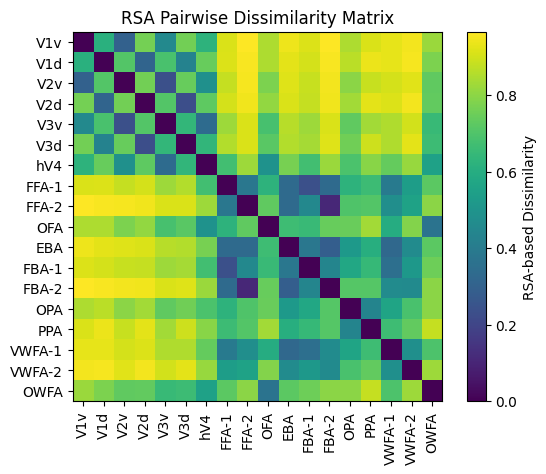

In [18]:
rsa_pairwise_dissimilarity_matrix = compute_rsa_pairwise_dissimilarities(neural_data)

viz.plot_pairwise_dis_matrix(rsa_pairwise_dissimilarity_matrix, functional_rois, "RSA")

Find high-dimensional Euclidean embedding for RSA space that preserves pairwise distances with Multidimensional Scaling (MDS):

In [19]:
from sklearn.manifold import MDS

mds_dimensions = 100

rsa_embedding = MDS(
    n_components=mds_dimensions,
    dissimilarity="precomputed",
    random_state=seed,
    normalized_stress=False,
)
rsa_mds_embedding = rsa_embedding.fit_transform(rsa_pairwise_dissimilarity_matrix)
print(f"RSA space MDS Stress = {rsa_embedding.stress_}")

RSA space MDS Stress = 0.05505033242282029


Project RSA space embeddings onto 2 principal components:

In [22]:
from neurometry.rep_metrics.dim_reduction import TorchPCA

rsa_pca = TorchPCA(n_components=2, device="cuda").fit(rsa_mds_embedding.T)
rsa_pca_mds_data = rsa_pca.get_top_n_components(n_components=2).cpu()
rsa_expl_var = rsa_pca.explained_variance_ratio_

print(f"PC1 explained variance = {100*rsa_expl_var[0]:.1f}%")
print(f"PC2 explained variance = {100*rsa_expl_var[1]:.1f}%")
print(f"Total 2D explained variance = {100*torch.sum(rsa_expl_var).item():.1f}%")

PC1 explained variance = 44.9%
PC2 explained variance = 14.4%
Total 2D explained variance = 59.2%


Visualize 2D projection:

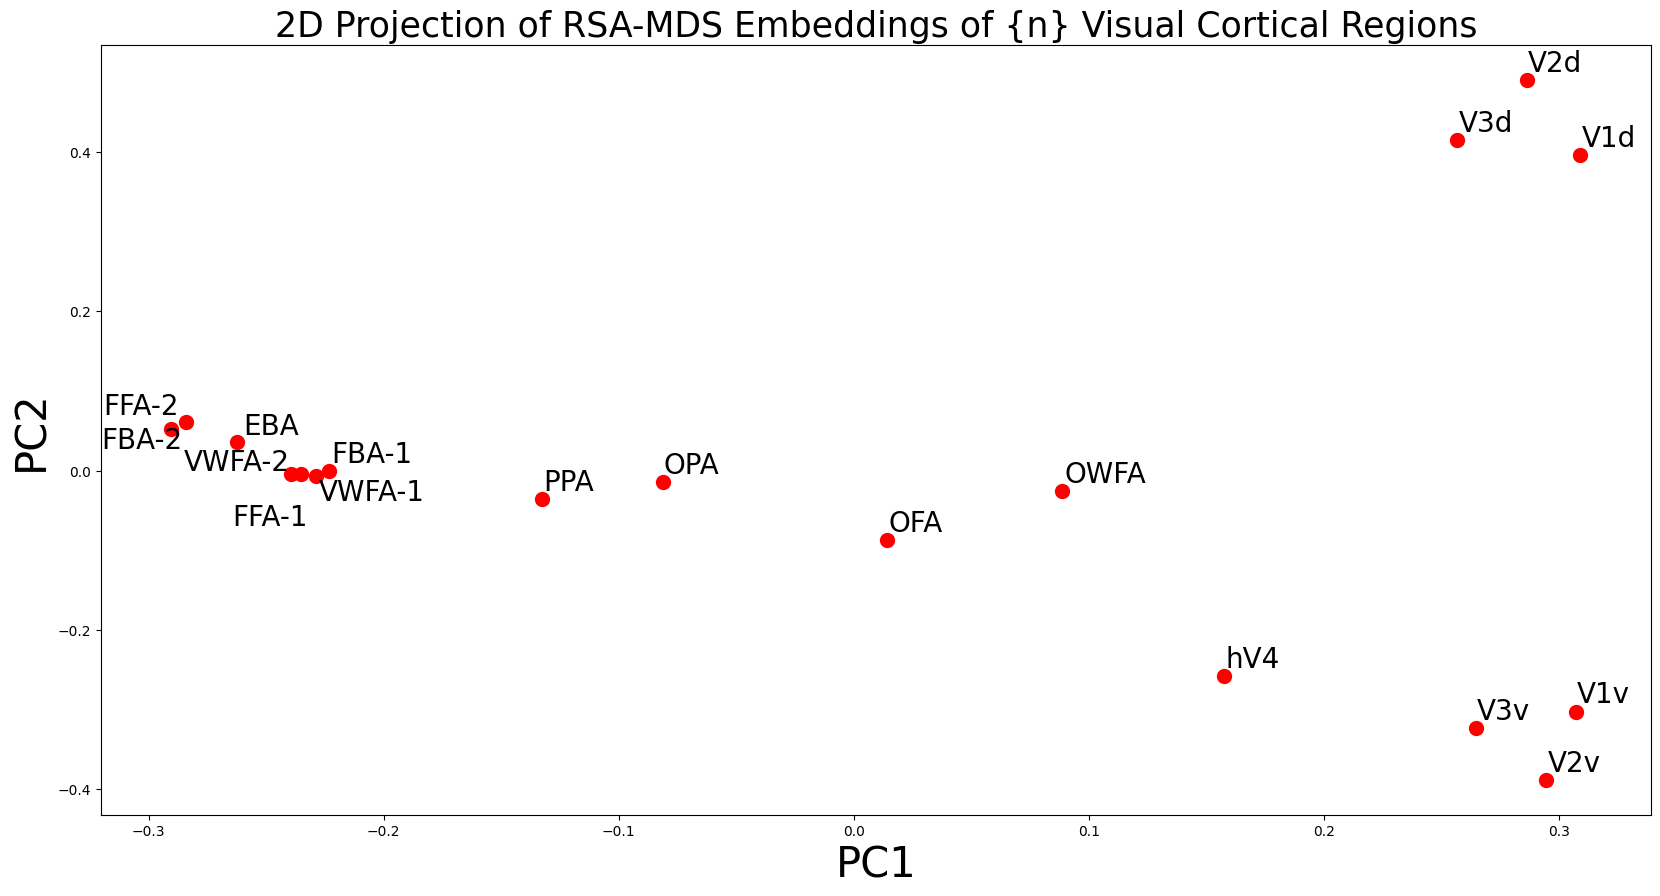

In [23]:
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()


texts = []
for idx, (x, y) in enumerate(rsa_pca_mds_data):
    ax.scatter(x, y, label=functional_rois[idx], s=100, c="red")
    texts.append(plt.text(x, y, functional_rois[idx], fontsize=20))

adjust_text(texts)

ax.set_xlabel("PC1", fontsize=30)
ax.set_ylabel("PC2", fontsize=30)
ax.set_title(
    "2D Projection of RSA-MDS Embeddings of {n} Visual Cortical Regions", fontsize=25
)
plt.show();

## Principal Component Analysis (PCA) of Voxel Responses

Plot PCA eigenspectrum for one region - e.g., Human V4

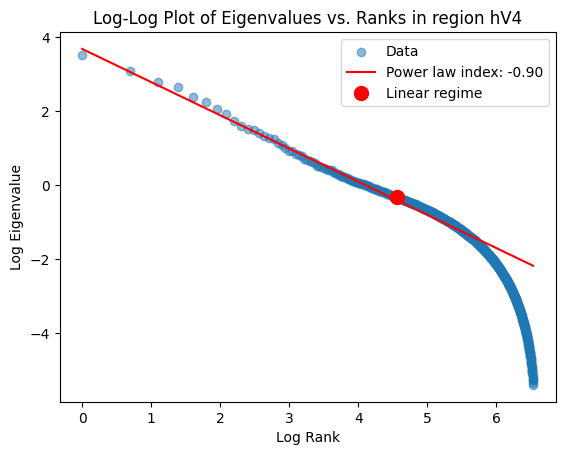

In [24]:
from neurometry.rep_metrics.dim_reduction import compute_power_law_index

region = "hV4"

slope, y_intercept, log_ranks, log_eigvals, knee_x, knee_y = compute_power_law_index(
    neural_data[region].to_numpy()
)

import viz

viz.plot_pca_spectrum(
    region, slope, y_intercept, log_ranks, log_eigvals, knee_x, knee_y
)

### Quantify geometric distortion introduced by PCA projection 

Plot cumulative variance explained ratio vs principal component dimensions

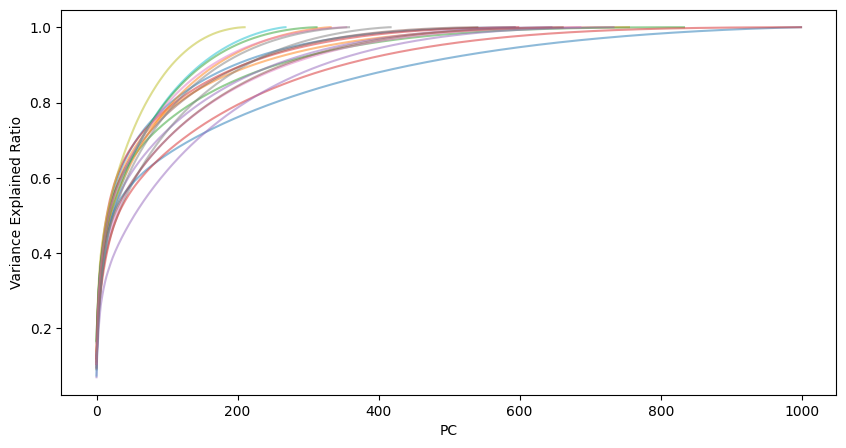

In [25]:
fig = plt.figure(figsize=(10, 5))
neural_data_region_pcas = {}
for region in functional_rois:
    pca = TorchPCA(device="cuda").fit(neural_data[region].to_numpy())
    neural_data_region_pcas[region] = pca
    plt.plot(pca.cumulative_explained_variance_ratio_.cpu(), alpha=0.5)
    plt.xlabel("PC")
    plt.ylabel("Variance Explained Ratio")

Analyze within-region pairwise-distance preservation

In [26]:
neural_data_list = [neural_data[region].to_numpy().T for region in neural_data.keys()]

In [28]:
from neurometry.rep_metrics.dim_reduction import compute_distance_preservation

corrs, stresses, all_us = compute_distance_preservation(neural_data_list)

100%|██████████| 211/211 [00:13<00:00, 15.99it/s]


correlation >= 0.95 at dim 5
stress <= 0.15 not attainable


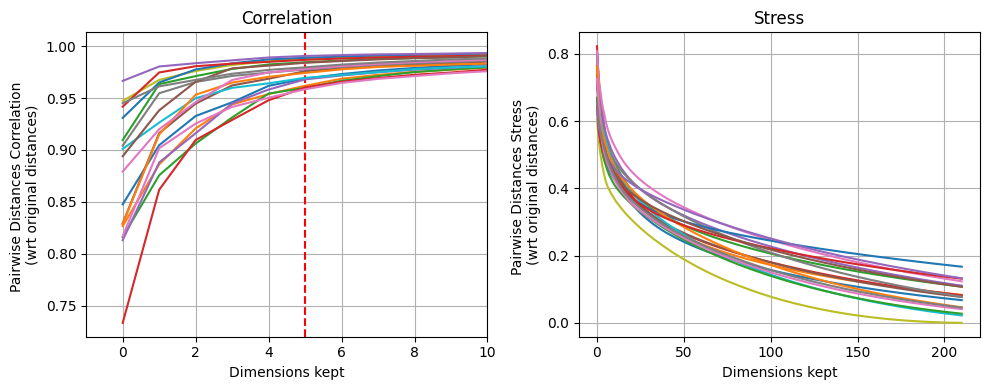

In [29]:
from neurometry.rep_metrics.dim_reduction import get_minimal_embedding

corr_reduced_neural_data, stress_reduced_neural_data = get_minimal_embedding(
    corrs, stresses, all_us, plot=True, corr_threshold=0.95, stress_threshold=0.15
)

viz.plot_pca_distortions(
    corrs, stresses, corrs_dim=corr_reduced_neural_data[0].shape[1]
)

### Perform PCA reduction with fixed n_components for all regions

In [30]:
import pandas as pd

n_components = 211

pca_reduced_neural_data = {}

for region in functional_rois:
    X = (
        neural_data_region_pcas[region]
        .get_top_n_components(n_components=n_components)
        .T
    )
    pca_reduced_neural_data[region] = pd.DataFrame(
        X.cpu(), columns=neural_data[region].columns
    )

## Compute shape-based distances between cortical networks

### Initialize metric

We choose a metric from a family of linear metrics parameterized by $\alpha \in [0,1]$, where

$\alpha = 0$ corresponds to [Canonical Correlation Analysis (CCA)](https://en.wikipedia.org/wiki/Canonical_correlation)

$\alpha = 1$ corresponds to [Procrustes distance](https://en.wikipedia.org/wiki/Procrustes_analysis)

### Compute region-region pairwise distance matrix

We have n = 18 cortical regions;
We need n(n-1)/2 = 153 distance calculations
Parallelizing 153 distance calculations with 32 processes.


Computing distances: 100%|██████████| 153/153 [00:11<00:00, 13.80it/s]


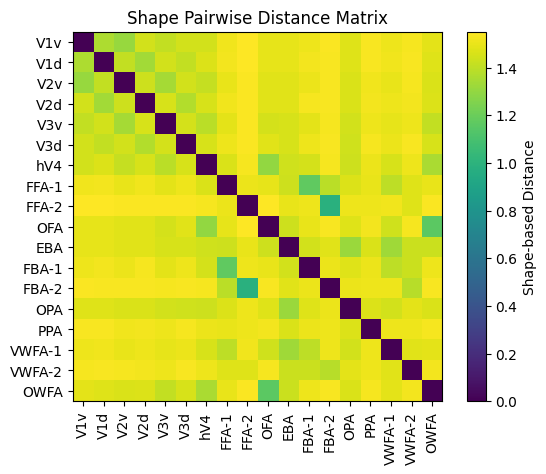

In [33]:
from neurometry.rep_metrics.dissimilarity import compute_pairwise_distances

alpha = 1  # Procrustes

pairwise_distance_matrix = compute_pairwise_distances(
    pca_reduced_neural_data, benchmark.stimulus_data, alpha=alpha
)
viz.plot_pairwise_dis_matrix(pairwise_distance_matrix, functional_rois, method="Shape")

Find high-dimensional Euclidean embedding that preserves pairwise distances with Multidimensional Scaling (MDS):

In [34]:
from sklearn.manifold import MDS

mds_dimensions = 100


shape_embedding = MDS(
    n_components=mds_dimensions,
    dissimilarity="precomputed",
    random_state=seed,
    normalized_stress=False,
)
shape_mds_embedding = shape_embedding.fit_transform(pairwise_distance_matrix)

print(f"Shape Space MDS Stress = {shape_embedding.stress_}")

Shape Space MDS Stress = 0.11314267535991743


Project Shape space embeddings onto 2 principal components:

In [35]:
shape_pca = TorchPCA(n_components=2, device="cuda").fit(shape_mds_embedding.T)
shape_pca_mds_data = shape_pca.get_top_n_components(n_components=2).cpu()
shape_expl_var = shape_pca.explained_variance_ratio_

print(f"PC1 explained variance = {100*shape_expl_var[0]:.1f}%")
print(f"PC2 explained variance = {100*shape_expl_var[1]:.1f}%")
print(f"Total 2D explained variance = {100*torch.sum(shape_expl_var).item():.1f}%")

PC1 explained variance = 10.6%
PC2 explained variance = 8.8%
Total 2D explained variance = 19.4%


Visualize 2D projection:

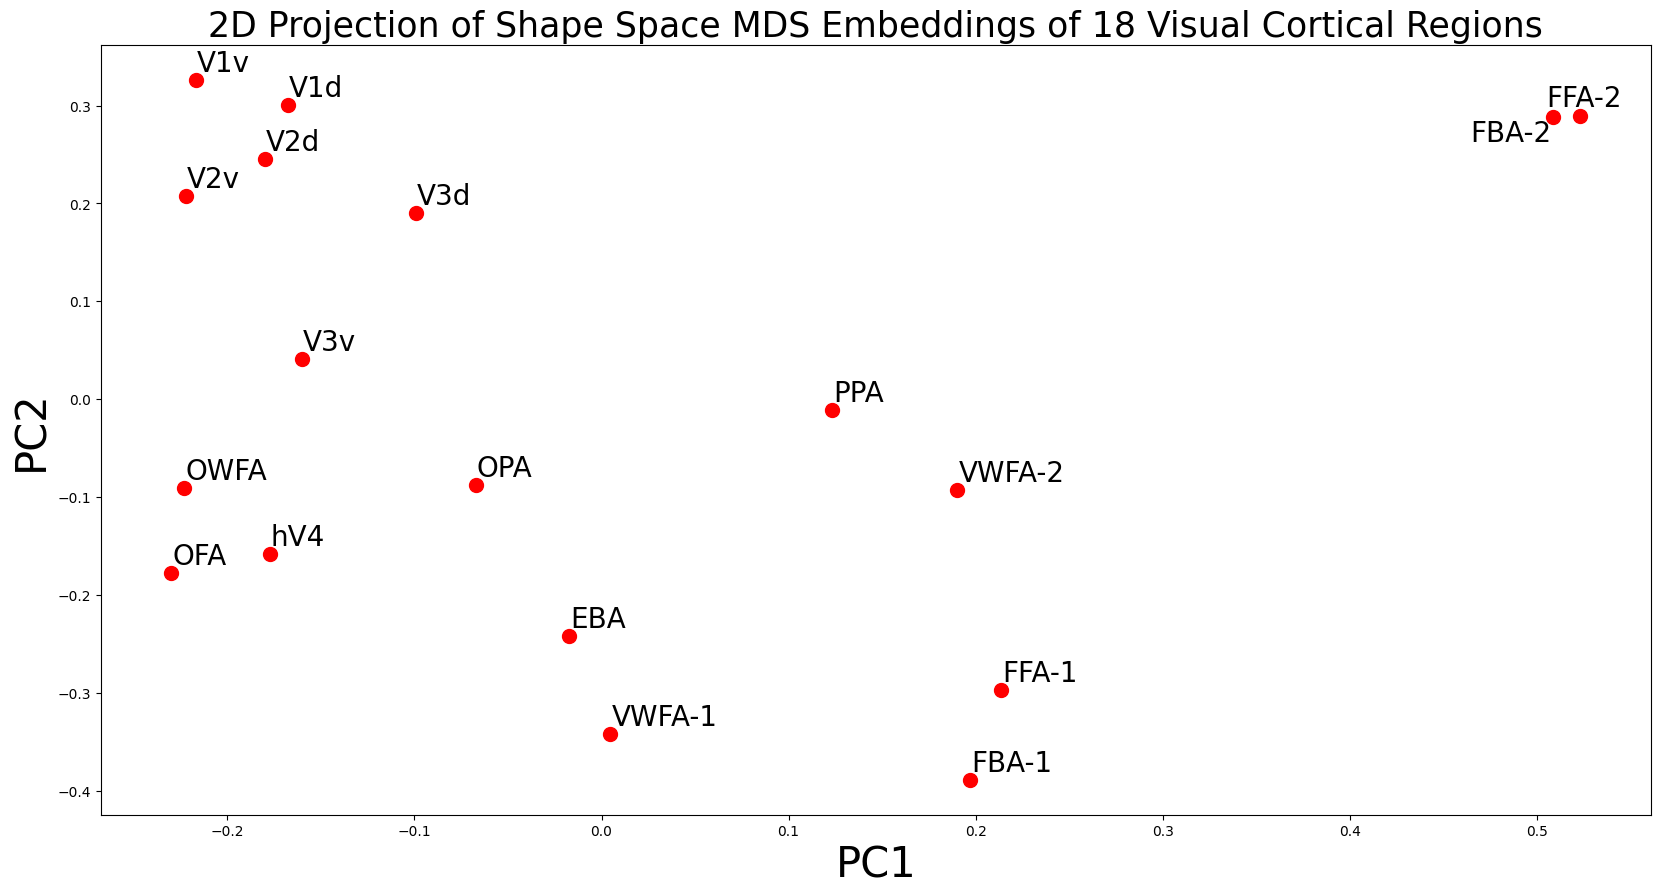

In [36]:
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()


texts = []
for idx, (x, y) in enumerate(shape_pca_mds_data):
    ax.scatter(x, y, label=functional_rois[idx], s=100, c="red")
    texts.append(plt.text(x, y, functional_rois[idx], fontsize=20))

adjust_text(texts)

ax.set_xlabel("PC1", fontsize=30)
ax.set_ylabel("PC2", fontsize=30)
ax.set_title(
    f"2D Projection of Shape Space MDS Embeddings of {len(texts)} Visual Cortical Regions",
    fontsize=25,
)
plt.show();

## Load anatomical map of visual cortex

## Visualize space of networks

In [28]:
color_map = {
    "Early Visual Cortex": "red",
    "Face Processing": "blue",
    "Word Processing": "green",
    "Body Processing": "purple",
    "Scene Processing": "yellow",
}

unique_regions = benchmark.metadata.drop_duplicates(subset="roi_name").set_index(
    "roi_name"
)
colors = unique_regions["roi_group"].map(color_map).to_list()

KeyError: Index(['roi_name'], dtype='object')

### PCA to 3D

In [ ]:
pca = TorchPCA(n_components=3, device="cuda").fit(mds_embedding.T)
pca_mds_data = pca.get_top_n_components(n_components=3).cpu()
print(pca_mds_data.shape)

torch.Size([19, 3])


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming pca_mds_data is a numpy array of shape (19, 3)
df_points = pd.DataFrame(pca_mds_data, columns=["PC1", "PC2", "PC3"])
df_points["Functional Region"] = unique_regions.index
df_points["Color"] = colors

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    df_points,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Color",
    text="Functional Region",
    color_discrete_sequence=df_points[
        "Color"
    ].unique(),  # use the same colors as defined
    labels={"Color": "Anatomical Region"},
    title="3D Projection of Shape-Space Embeddings of 19 Visual Cortical Regions",
)

fig.update_traces(marker=dict(size=10), selector=dict(mode="markers+text"))

# Adjust axis labels
fig.update_layout(
    scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"),
    width=1200,
    height=800,
)

fig.show()

## Visualize shape-based network embeddings for different values of $\alpha \in [0,1]$, 'score_methods' $\in$ {'angular','euclidean'}

In [ ]:
def visualize_2d_embeddings(alpha, score_method, train_data, test_data):
    metric = LinearMetric(alpha=alpha, center_columns=True, score_method=score_method)

    os.environ["OMP_NUM_THREADS"] = "1"

    n = len(cortical_regions)
    print(f"We have n = {n} cortical regions;")
    print(f"We need n(n-1)/2 = {int((n*(n-1)/2))} distance calculations")

    D_train, D_test = metric.pairwise_distances(train_data, test_data)

    mds_dimensions = 100

    embedding = MDS(
        n_components=mds_dimensions,
        dissimilarity="precomputed",
        random_state=seed,
        normalized_stress=False,
    )
    mds_embedding = embedding.fit_transform(D_test)

    pca = TorchPCA(n_components=2, device="cuda").fit(mds_embedding.T)
    pca_mds_data = pca.get_top_n_components(n_components=2).cpu()

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot()

    texts = []
    for idx, (x, y) in enumerate(pca_mds_data):
        ax.scatter(x, y, color=colors[idx], label=unique_regions.index[idx], s=100)
        texts.append(plt.text(x, y, unique_regions.index[idx], fontsize=20))

    adjust_text(texts)

    ax.set_xlabel("PC1", fontsize=30)
    ax.set_ylabel("PC2", fontsize=30)
    ax.set_title(
        "2D Projection of Shape-Space Embeddings of 19 Visual Cortical Regions",
        fontsize=25,
    )
    plt.show();

### $\alpha=1$, score_method = "euclidean"

We have n = 19 cortical regions;
We need n(n-1)/2 = 171 distance calculations
Parallelizing 171 distance calculations with 32 processes.


Computing distances: 100%|██████████| 171/171 [00:10<00:00, 15.58it/s]


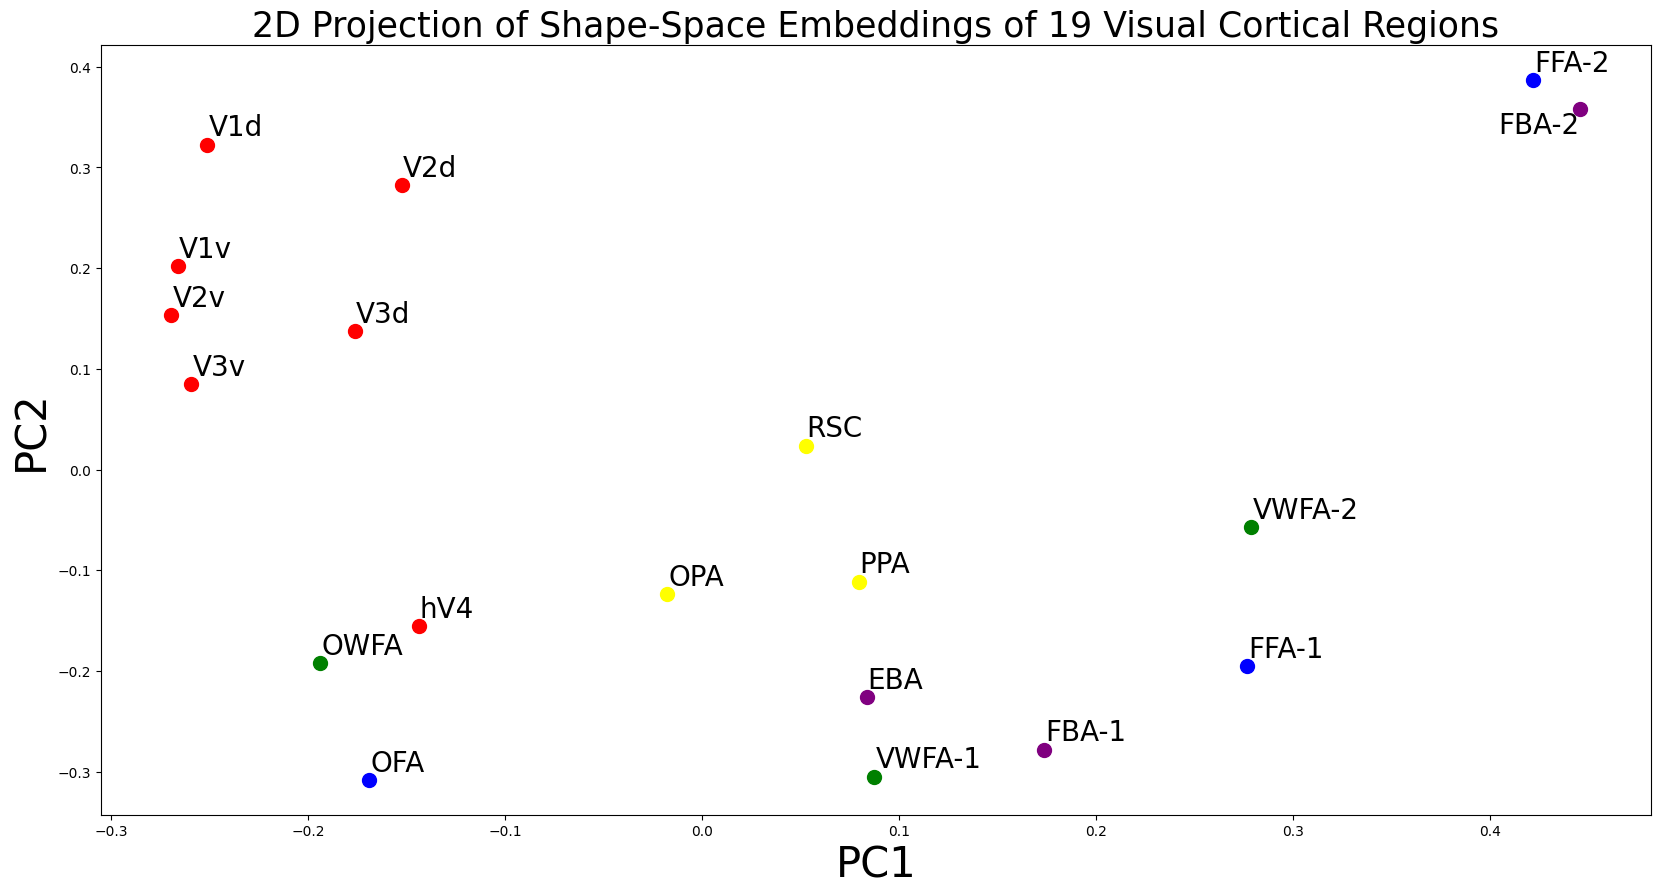

In [ ]:
visualize_2d_embeddings(
    alpha=1,
    score_method="euclidean",
    train_data=train_data,
    test_data=test_data,
)

### $\alpha=1$, score_method = "angular"

We have n = 19 cortical regions;
We need n(n-1)/2 = 171 distance calculations
Parallelizing 171 distance calculations with 32 processes.


Computing distances: 100%|██████████| 171/171 [00:08<00:00, 19.94it/s]


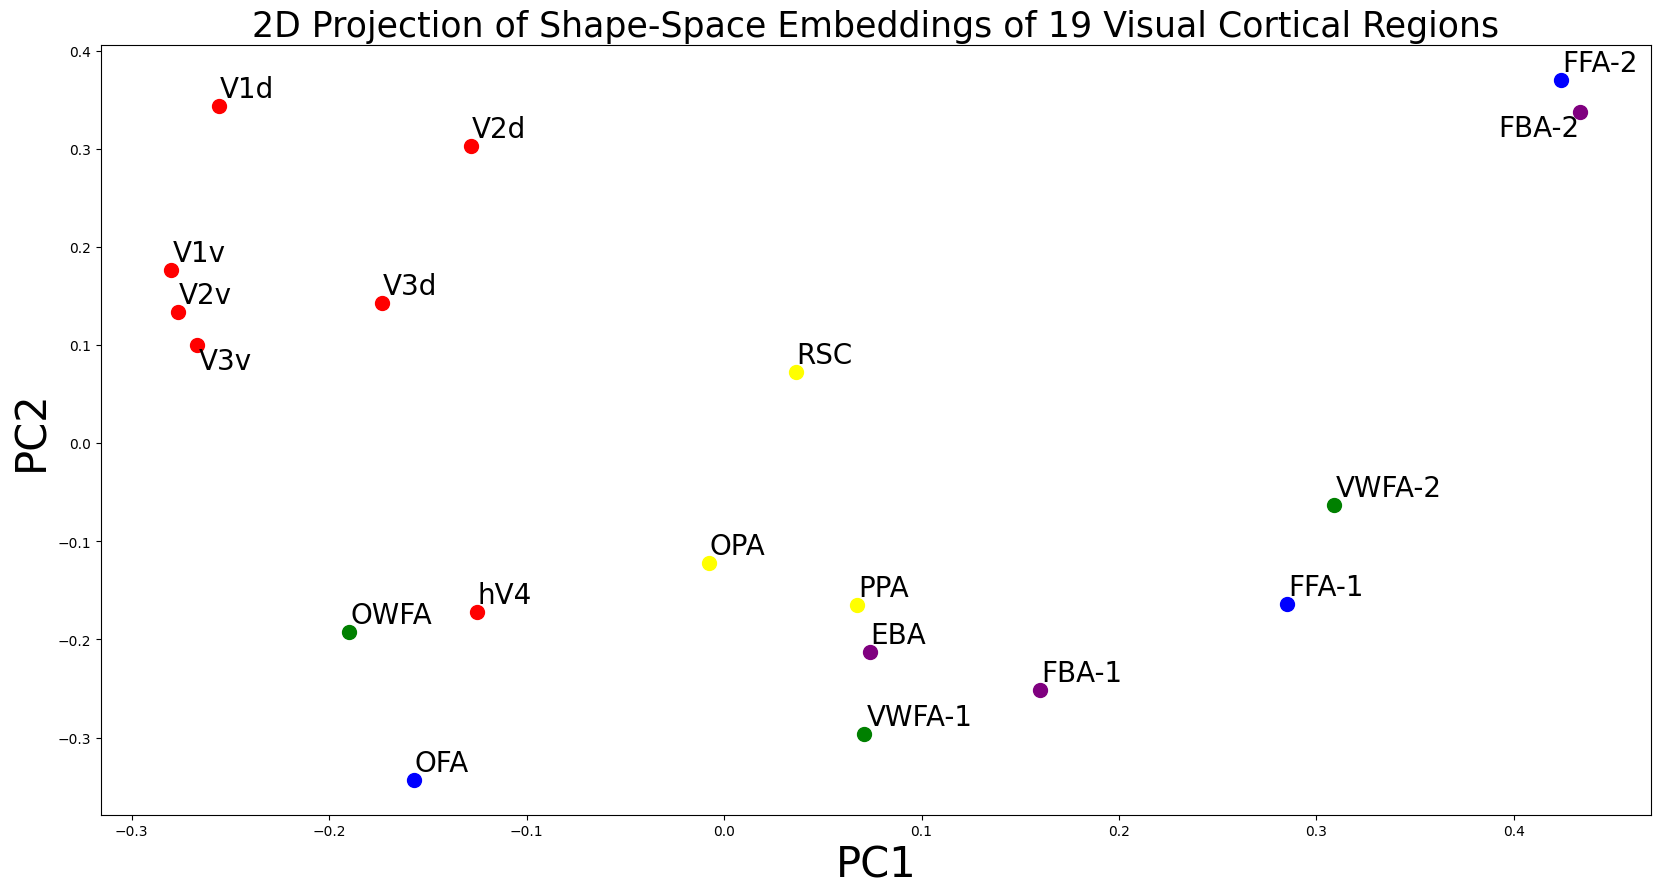

In [ ]:
visualize_2d_embeddings(
    alpha=1,
    score_method="angular",
    train_data=train_data,
    test_data=test_data,
)

### $\alpha=0.5$, score_method = "angular"

We have n = 19 cortical regions;
We need n(n-1)/2 = 171 distance calculations
Parallelizing 171 distance calculations with 32 processes.


Computing distances: 100%|██████████| 171/171 [00:10<00:00, 16.21it/s]


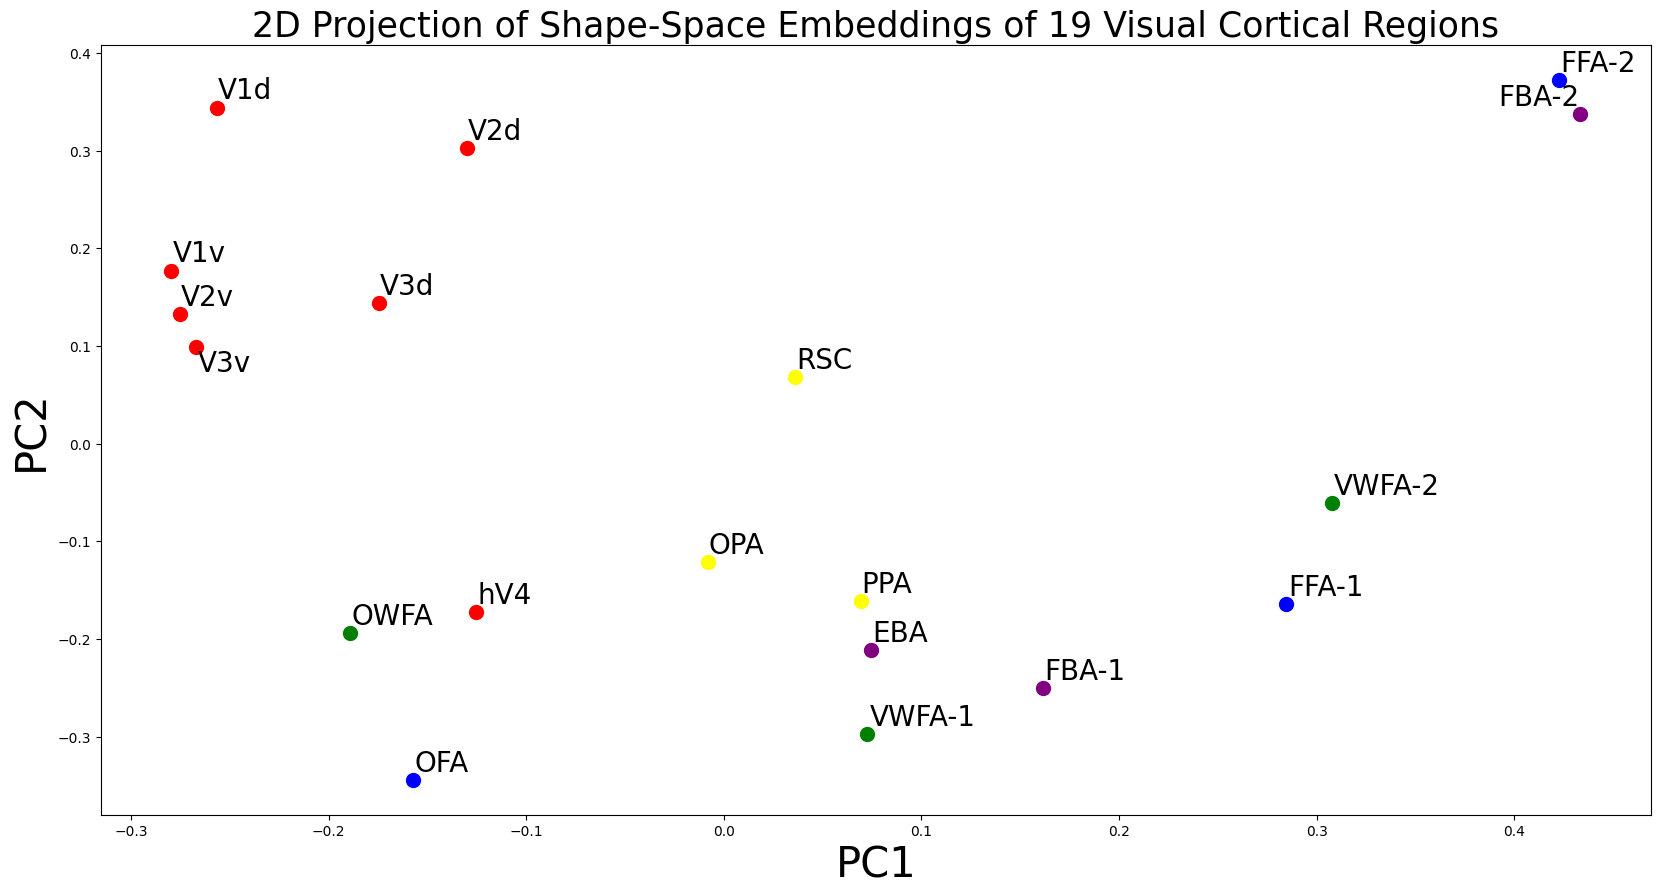

In [ ]:
visualize_2d_embeddings(
    alpha=0.5,
    score_method="angular",
    train_data=train_data,
    test_data=test_data,
)